

---



---

#Gradient Boosting Regressor

---



---




The Gradient Boosting Regressor is a sequential ensemble learning algorithm used for regression tasks. It combines multiple weak learners, typically decision trees, to create a strong predictive model. It minimizes a loss function using gradient descent optimization and controls model complexity with a shrinkage parameter (learning rate).


In this notebook, we will demonstrate ensemble learning using the Gradient Boosting Regressor on the make_moons dataset. Additionally, we will explore the concept of early stopping to prevent overfitting during model training.


  - `GradientBoostingRegressor` in Scikit-Learn implements gradient boosting for regression tasks, where each new model is fit to the residual errors of the previous models, gradually improving prediction accuracy.
  - It builds an ensemble of decision trees sequentially, with each tree attempting to correct the errors made by the previous trees.
  - [Scikit-Learn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)


#Setup

In [ ]:
# import libraries
import sklearn
import numpy as np
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)



#Generating Random Dataset

In [ ]:
# Set the random seed for reproducibility
np.random.seed(42)

# Generate random input features between -0.5 and 0.5
X = np.random.rand(100, 1) - 0.5

# Generate target values using a quadratic function with added random noise
y = 3 * X[:, 0]**2 + 0.05 * np.random.randn(100)


#Setup the models


 **GradientBoostingRegressor**
  - `n_estimators`:  specifies the number of boosting stages (i.e., the number of weak learners) to be used in the ensemble.
                     Increasing this parameter typically improves the model's performance, but it also increases computational complexity.

  - `max_depth`: controls the maximum depth of the individual decision trees in the ensemble.
                A deeper tree can capture more complex patterns in the data, but it also increases the risk of overfitting.
  - `warm_start` is a boolean parameter that enables incremental training. When set to True, it allows the addition of new estimators to an existing ensemble, rather than    starting from scratch. This can be useful for model tuning or online learning scenarios.


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor


gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X, y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3,
                          random_state=42)

In [ ]:
gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt_slow.fit(X, y)

GradientBoostingRegressor(max_depth=2, n_estimators=200, random_state=42)

In [ ]:
def plot_predictions(regressors, X, y, axes, label=None, style="g-", data_style="r.", data_label=None):
    # Generate a range of x-values for plotting
    x1 = np.linspace(axes[0], axes[1], 500)
    # Compute the predictions of the ensemble of regressors
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    # Plot the original data points
    plt.plot(X[:, 0], y, data_style, label=data_label)
    # Plot the ensemble predictions
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    # Add legend if labels are provided
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    # Set the axis limits
    plt.axis(axes)


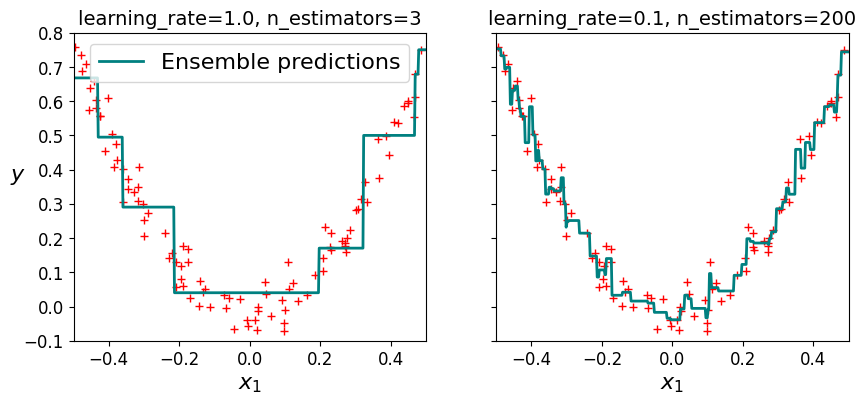

In [ ]:
# Fix the axes and create subplots
fix, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

# Plot the ensemble predictions of the first model
plt.sca(axes[0])
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions", style='teal', data_style="r+")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

# Plot the ensemble predictions of the second model
plt.sca(axes[1])
plot_predictions([gbrt_slow], X, y, axes=[-0.5, 0.5, -0.1, 0.8], style='teal', data_style="r+")
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate, gbrt_slow.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)

# Display the plot
plt.show()


**Gradient Boosting with Early stopping:**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

# Initialize a GradientBoostingRegressor with specified parameters
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
# Fit the model on the training data
gbrt.fit(X_train, y_train)

# Compute the mean squared error for different numbers of estimators
errors = [mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(X_val)]
# Find the best number of estimators based on the minimum validation error
bst_n_estimators = np.argmin(errors) + 1

# Initialize a GradientBoostingRegressor with the best number of estimators
gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators, random_state=42)
# Fit the model on the training data with the best number of estimators
gbrt_best.fit(X_train, y_train)


GradientBoostingRegressor(max_depth=2, n_estimators=56, random_state=42)

In [ ]:
min_error = np.min(errors)

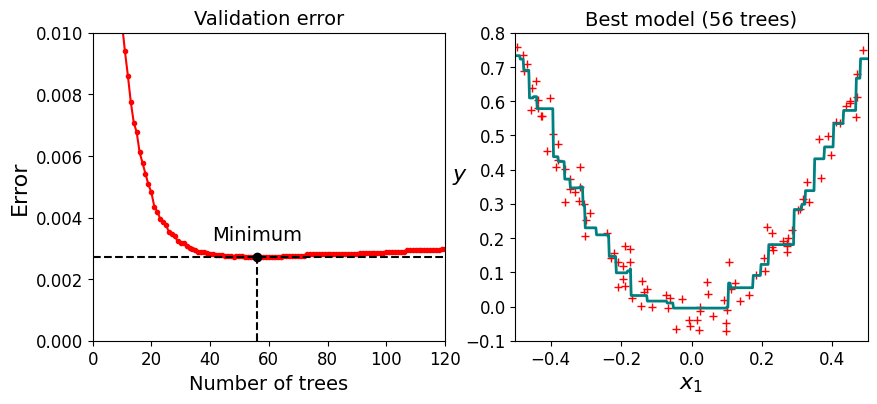

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(np.arange(1, len(errors) + 1), errors, "r.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.ylabel("Error", fontsize=16)
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8], style='teal',data_style="r+")
plt.title("Best model (%d trees)" % bst_n_estimators, fontsize=14)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.xlabel("$x_1$", fontsize=16)


plt.show()

In [ ]:
# Initialize the GradientBoostingRegressor with specified parameters
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42)

# Initialize variables to track validation error and early stopping criteria
min_val_error = float("inf")
error_going_up = 0

# Iterate over different numbers of estimators for early stopping
for n_estimators in range(1, 120):
    # Set the number of estimators for the GradientBoostingRegressor
    gbrt.n_estimators = n_estimators
    # Fit the model on the training data
    gbrt.fit(X_train, y_train)
    # Make predictions on the validation set
    y_pred = gbrt.predict(X_val)
    # Compute the mean squared error for validation predictions
    val_error = mean_squared_error(y_val, y_pred)
    # Check if validation error is less than the minimum validation error
    if val_error < min_val_error:
        # Update the minimum validation error
        min_val_error = val_error
        # Reset the counter for consecutive iterations with increasing validation error
        error_going_up = 0
    else:
        # Increment the counter for consecutive iterations with increasing validation error
        error_going_up += 1
        # Check if the early stopping criteria (5 consecutive iterations with increasing validation error) is met
        if error_going_up == 5:
            # Break the loop for early stopping
            break


In [ ]:
gbrt.n_estimators

61

In [ ]:
 min_val_error

0.002712853325235463

# XGBoost:
**XGBoost** is a powerful machine learning algorithm for supervised learning, known for its speed and performance, particularly in structured data problems. It builds decision trees sequentially to correct errors made by previous trees, optimizing overall model performance.

  - XGBoost is a scalable machine learning library known for its high performance and accuracy in various machine learning tasks, including classification, regression, and ranking.
  - It implements gradient boosting algorithms and offers additional features such as parallelization, regularization, and tree pruning to enhance model performance.
  - [Scikit-Learn Documentation](https://xgboost.readthedocs.io/en/latest/)

In [ ]:
# Check if XGBoost is installed, and if not, print an error message
try:
    import xgboost
except ImportError as ex:
    print("Error: the xgboost library is not installed.")
    xgboost = None


In [ ]:
if xgboost is not None:
    # Create and train an XGBoost regressor
    xgb_reg = xgboost.XGBRegressor(random_state=42)
    xgb_reg.fit(X_train, y_train)
    # Make predictions on the validation set
    y_pred = xgb_reg.predict(X_val)
    # Calculate the mean squared error on the validation set
    val_error = mean_squared_error(y_val, y_pred)
    # Print the validation MSE
    print("Validation MSE:", val_error)


Validation MSE: 0.004644479346317078


In [ ]:
if xgboost is not None:
    # Train the XGBoost regressor with early stopping
    xgb_reg.fit(X_train, y_train,
                eval_set=[(X_val, y_val)], early_stopping_rounds=2)
    # Make predictions on the validation set
    y_pred = xgb_reg.predict(X_val)
    # Calculate the mean squared error on the validation set
    val_error = mean_squared_error(y_val, y_pred)
    # Print the validation MSE
    print("Validation MSE:", val_error)


[0]	validation_0-rmse:0.15232
[1]	validation_0-rmse:0.10690
[2]	validation_0-rmse:0.07868
[3]	validation_0-rmse:0.06385
[4]	validation_0-rmse:0.05656
[5]	validation_0-rmse:0.05486
[6]	validation_0-rmse:0.05394
[7]	validation_0-rmse:0.05556
Validation MSE: 0.0029091166440151123


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


In [ ]:
# Measure the time taken to train the XGBoost regressor if the library is available
%timeit xgboost.XGBRegressor().fit(X_train, y_train) if xgboost is not None else None


The slowest run took 24.39 times longer than the fastest. This could mean that an intermediate result is being cached.
252 ms ± 215 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
# Measure the time taken to train the GradientBoostingRegressor
%timeit GradientBoostingRegressor().fit(X_train, y_train)


The slowest run took 5.31 times longer than the fastest. This could mean that an intermediate result is being cached.
87.6 ms ± 56.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
